In [244]:
import sqlite3
import pandas as pd
import numpy as npa

In [245]:
def create_connection(db_file):
    """ 
    Create a database connection to the SQLite database as
    specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [246]:
conn = create_connection('C:/Users/Yaphet Tewahade/Cloudy-with-a-Chance-of-Football/fixtures/database/cloudy_with_a_chance_of_football.db')

In [247]:
cursorObj = conn.cursor()

In [248]:
cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',), ('weather',), ('hours_displaced',), ('stats_regular',), ('stats_red_zone',), ('elevation_and_conference',), ('performance_target',)]


In [249]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [250]:
df = pd.read_sql_query(
        "SELECT * FROM weather", conn)

In [251]:
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail
0,2019_1,CHI,GB,65,7,East - SouthEast,0.10,0.0,0.66,Clear
1,2019_1,ARZ,DET,72,0,No wind,0.39,0.0,0.32,DOME
2,2019_1,CAR,LAR,85,3,East,0.00,0.0,0.48,Clear
3,2019_1,CLV,TEN,69,6,NorthEast,0.61,0.0,0.64,Mostly Cloudy
4,2019_1,DAL,NYG,72,0,No wind,0.80,0.0,0.28,DOME
...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,NorthEast,0.10,0.0,0.87,Overcast
508,2020_17,NYG,DAL,34,8,NorthEast,0.99,0.0,0.94,Overcast
509,2020_17,PHI,WAS,37,6,North - NorthEast,0.99,0.0,0.94,Overcast
510,2020_17,SF,SEA,55,2,North - NorthWest,0.84,0.0,0.77,Mostly Cloudy


In [252]:
import os
import json
import time
import pickle
import requests
import time
import warnings
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt

# Ignore warnings from scikit-learn to make this notebook a bit nicer
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)


from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
#Pipeline toolset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

#Model toolset
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

In [253]:
#prep values for onehotencoding 
labelencoder = LabelEncoder()

In [254]:
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail
0,2019_1,CHI,GB,65,7,East - SouthEast,0.10,0.0,0.66,Clear
1,2019_1,ARZ,DET,72,0,No wind,0.39,0.0,0.32,DOME
2,2019_1,CAR,LAR,85,3,East,0.00,0.0,0.48,Clear
3,2019_1,CLV,TEN,69,6,NorthEast,0.61,0.0,0.64,Mostly Cloudy
4,2019_1,DAL,NYG,72,0,No wind,0.80,0.0,0.28,DOME
...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,NorthEast,0.10,0.0,0.87,Overcast
508,2020_17,NYG,DAL,34,8,NorthEast,0.99,0.0,0.94,Overcast
509,2020_17,PHI,WAS,37,6,North - NorthEast,0.99,0.0,0.94,Overcast
510,2020_17,SF,SEA,55,2,North - NorthWest,0.84,0.0,0.77,Mostly Cloudy


In [255]:
df['weather_wind_direction'].unique()

array(['East - SouthEast', 'No wind', 'East', 'NorthEast', 'SouthWest',
       'South - SouthWest', 'SouthEast', 'NorthWest', 'West - NorthWest',
       'West', 'South', 'West - SouthWest', 'North - NorthWest',
       'East - NorthEast', 'North', 'North - NorthEast',
       'South - SouthEast'], dtype=object)

In [256]:
df['weather_wind_direction'] = labelencoder.fit_transform(df['weather_wind_direction'])
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,Clear
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,DOME
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,Clear
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,Mostly Cloudy
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,DOME
...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,Overcast
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,Overcast
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,Overcast
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,Mostly Cloudy


In [257]:
#find mean of column for labeling
df['weather_precipitation'].mean()

0.019003906249999987

<AxesSubplot:>

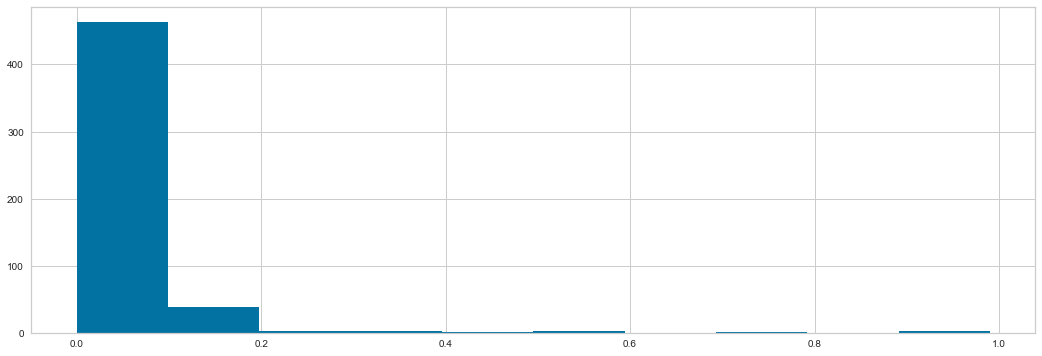

In [258]:
df['weather_precipitation'].hist(figsize=(18,6))

In [259]:
#re-label cateogrical data 
df.loc[df['weather_precipitation'] > 0.019, 'precipitation_label'] = 'rain'
df.loc[df['weather_precipitation'].between(0.001, 0.019, inclusive=True), 'precipitation_label'] = 'light rain'
df.loc[df['weather_precipitation'] == 0, 'precipitation_label'] = 'no rain'
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,Clear,no rain
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,DOME,no rain
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,Clear,no rain
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,Mostly Cloudy,no rain
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,DOME,no rain
...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,Overcast,no rain
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,Overcast,no rain
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,Overcast,no rain
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,Mostly Cloudy,no rain


In [260]:
#transform cateogorical labels in 'percipitation_label' column into numbers
#1 = no rain
#0 = heavy rain
df['precipitation_label'] = labelencoder.fit_transform(df['precipitation_label'])
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,Clear,0
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,DOME,0
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,Clear,0
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,Mostly Cloudy,0
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,DOME,0
...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,Overcast,0
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,Overcast,0
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,Overcast,0
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,Mostly Cloudy,0


In [261]:
#find mean of column for labeling
df['weather_cloud_cover'].mean()

0.3938085937499999

In [262]:
#create new column and cateogrical data for wind label mph

df.loc[df['weather_cloud_cover'] > 0.394, 'cloud_label'] = 'cloudy'
df.loc[df['weather_cloud_cover'].between(0.001, 0.393, inclusive=True), 'cloud_label'] = 'lightly cloudy'
df.loc[df['weather_cloud_cover'] == 0, 'cloud_label'] = 'clear skies'
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label,cloud_label
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,Clear,0,lightly cloudy
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,DOME,0,lightly cloudy
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,Clear,0,clear skies
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,Mostly Cloudy,0,cloudy
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,DOME,0,cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,Overcast,0,lightly cloudy
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,Overcast,0,cloudy
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,Overcast,0,cloudy
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,Mostly Cloudy,0,cloudy


In [263]:
#transform cateogorical values in 'cloud_label' column into numbers
#2 = lightly cloudy
#1 = cloudy
#0 = clear skies
df['cloud_label'] = labelencoder.fit_transform(df['cloud_label'])
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label,cloud_label
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,Clear,0,2
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,DOME,0,2
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,Clear,0,0
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,Mostly Cloudy,0,1
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,DOME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,Overcast,0,2
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,Overcast,0,1
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,Overcast,0,1
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,Mostly Cloudy,0,1


In [264]:
#transform cateogorical values in column into numbers
df['weather_detail'] = labelencoder.fit_transform(df['weather_detail'])
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label,cloud_label
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,0,0,2
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,1,0,2
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,0,0,0
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,12,0,1
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,13,0,2
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,13,0,1
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,13,0,1
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,12,0,1


In [265]:
df['weather_temperature'].mean()

62.666015625

<AxesSubplot:>

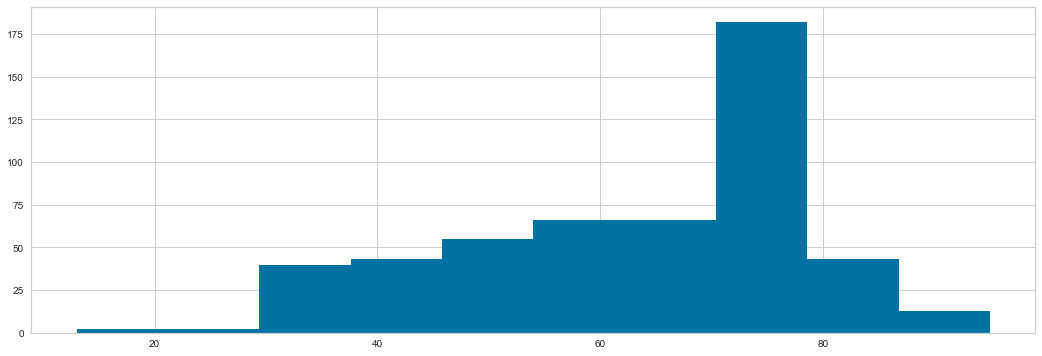

In [266]:
df['weather_temperature'].hist(figsize=(18,6))

In [267]:
#create new column and cateogrical data for weather temperature

df.loc[df['weather_temperature'] >= 80, 'temp_label'] = 'hot'
df.loc[df['weather_temperature'].between(50, 79, inclusive=True), 'temp_label'] = 'agreeable'
df.loc[df['weather_temperature'] <= 49, 'temp_label'] = 'cold'
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label,cloud_label,temp_label
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,0,0,2,agreeable
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,1,0,2,agreeable
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,0,0,0,hot
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,12,0,1,agreeable
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,1,0,1,agreeable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,13,0,2,cold
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,13,0,1,cold
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,13,0,1,cold
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,12,0,1,agreeable


In [268]:
df['temp_label'] = labelencoder.fit_transform(df['temp_label'])
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label,cloud_label,temp_label
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,0,0,2,0
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,1,0,2,0
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,0,0,0,2
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,12,0,1,0
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,13,0,2,1
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,13,0,1,1
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,13,0,1,1
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,12,0,1,0


In [269]:
df['weather_humidity'].mean()

0.6219531249999996

In [270]:
df.loc[df['weather_humidity'] >= 0.622, 'humidity'] = 'humid'
df.loc[df['weather_humidity'].between(0.001, 0.621, inclusive=True), 'humidity'] = 'mild humidity'
df.loc[df['weather_humidity'] == 0, 'humidity'] = 'dry'
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label,cloud_label,temp_label,humidity
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,0,0,2,0,humid
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,1,0,2,0,mild humidity
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,0,0,0,2,mild humidity
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,12,0,1,0,humid
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,1,0,1,0,mild humidity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,13,0,2,1,humid
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,13,0,1,1,humid
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,13,0,1,1,humid
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,12,0,1,0,humid


In [271]:
#transform string categories into numeric
df['humidity'] = labelencoder.fit_transform(df['humidity'])
df

,week_id,team_home_short,team_away_short,weather_temperature,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,weather_humidity,weather_detail,precipitation_label,cloud_label,temp_label,humidity
0,2019_1,CHI,GB,65,7,2,0.10,0.0,0.66,0,0,2,0,0
1,2019_1,ARZ,DET,72,0,3,0.39,0.0,0.32,1,0,2,0,1
2,2019_1,CAR,LAR,85,3,0,0.00,0.0,0.48,0,0,0,2,1
3,2019_1,CLV,TEN,69,6,7,0.61,0.0,0.64,12,0,1,0,0
4,2019_1,DAL,NYG,72,0,3,0.80,0.0,0.28,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,33,5,7,0.10,0.0,0.87,13,0,2,1,0
508,2020_17,NYG,DAL,34,8,7,0.99,0.0,0.94,13,0,1,1,0
509,2020_17,PHI,WAS,37,6,5,0.99,0.0,0.94,13,0,1,1,0
510,2020_17,SF,SEA,55,2,6,0.84,0.0,0.77,12,0,1,0,0


In [272]:
weather_onehot = df.drop(['weather_temperature','weather_wind_mph_number','weather_wind_direction','weather_precipitation','weather_humidity', 'weather_cloud_cover'],axis = 1)

In [273]:
weather_onehot

,week_id,team_home_short,team_away_short,weather_detail,precipitation_label,cloud_label,temp_label,humidity
0,2019_1,CHI,GB,0,0,2,0,0
1,2019_1,ARZ,DET,1,0,2,0,1
2,2019_1,CAR,LAR,0,0,0,2,1
3,2019_1,CLV,TEN,12,0,1,0,0
4,2019_1,DAL,NYG,1,0,1,0,1
...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,13,0,2,1,0
508,2020_17,NYG,DAL,13,0,1,1,0
509,2020_17,PHI,WAS,13,0,1,1,0
510,2020_17,SF,SEA,12,0,1,0,0


In [274]:
enc = OneHotEncoder(handle_unknown='ignore')
# transforming columns using one hot
enc_df = pd.DataFrame(enc.fit_transform(df[['weather_detail','precipitation_label','cloud_label','temp_label','humidity']]).toarray())

In [275]:
weather_onehot = weather_onehot.join(enc_df)

In [276]:
weather_onehot

,week_id,team_home_short,team_away_short,weather_detail,precipitation_label,cloud_label,temp_label,humidity,0,1,...,21,22,23,24,25,26,27,28,29,30
0,2019_1,CHI,GB,0,0,2,0,0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2019_1,ARZ,DET,1,0,2,0,1,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2019_1,CAR,LAR,0,0,0,2,1,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2019_1,CLV,TEN,12,0,1,0,0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2019_1,DAL,NYG,1,0,1,0,1,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,13,0,2,1,0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
508,2020_17,NYG,DAL,13,0,1,1,0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
509,2020_17,PHI,WAS,13,0,1,1,0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
510,2020_17,SF,SEA,12,0,1,0,0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [277]:
weather_onehot = weather_onehot.drop (['weather_detail','precipitation_label','cloud_label','temp_label','humidity'],axis = 1)

In [278]:
weather_onehot

,week_id,team_home_short,team_away_short,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27,28,29,30
0,2019_1,CHI,GB,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2019_1,ARZ,DET,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2019_1,CAR,LAR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2019_1,CLV,TEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2019_1,DAL,NYG,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2020_17,NE,NYJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
508,2020_17,NYG,DAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
509,2020_17,PHI,WAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
510,2020_17,SF,SEA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
